# データセット取得（Kiva Microfunds）
Kiva Microfundsは、個人が世界中の低所得の起業家や学生にお金を貸せるようにする非営利団体のデータセット

以下のようなデータが含まれます。

* country：借り手の国
* en：ローンを申請したときの借り手の事情
* gender：性別（M=男性、F=女性）
* loan_amount：支払われたローンの金額
* nonpayment：貸し手の種類<br>Lender=Kiva Webサイトの個人登録ユーザー、partner= Kivaと協力してローンを見つけて資金を提供するマイクロファイナンス機関
* sector：借り手の職種
* status：ローンのステータス（1=デフォルト、0=返済済み）

In [1]:
# PyCaretチュートリアル用データセット取得
# 詳細は<https://pycaret.org/get-data/>を参照
from pycaret.datasets import get_data

dataset = get_data('kiva')
dataset.to_csv('./dataset.csv')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      6818 non-null   object
 1   en           6818 non-null   object
 2   gender       6818 non-null   object
 3   loan_amount  6818 non-null   int64 
 4   nonpayment   6818 non-null   object
 5   sector       6818 non-null   object
 6   status       6818 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 373.0+ KB


In [3]:
# 1000データサンプリング
sample_data = dataset.sample(1000, random_state=42).reset_index(drop=True)

print('データ　　　　：' + str(dataset.shape) + ' ' + str(dataset.index))
print('サンプルデータ：' + str(sample_data.shape) + ' ' + str(sample_data.index))

データ　　　　：(6818, 7) RangeIndex(start=0, stop=6818, step=1)
サンプルデータ：(1000, 7) RangeIndex(start=0, stop=1000, step=1)


# PyCaretでのデータセットアップ

In [4]:
# 自然言語処理用インポート
from pycaret.nlp import *

### 注意点
pycaretをインストールしても、言語モデルは自動的にはダウンロードされないため、以下コマンドでインストールする

```python
python -m spacy download en_core_web_sm
python -m textblob.download_corpora
```

In [5]:
# 目的変数を'en'に指定しデータのセットアップを実施
# session_idを指定することで欄数シードを固定
# セットアップが完了するとデータの情報や前処理のパイプラインの情報が表示される
# 詳細は<https://pycaret.org/setup/>を参照
exp = setup(sample_data, target='en', session_id=42)

Description,Value
session_id,42
# Documents,1000
Vocab Size,4628
Custom Stopwords,False


### 実施される前処理
<b>数字の削除</b>：すべての数字がテキストから削除し、ブランクで置き換える

<b>特殊文字の削除</b>：英数字以外のすべての特殊文字が削除し、ブランクに置き換える

<b>トークン化</b>：単語をトークン化する

<b>ストップワードの削除</b>：ストップワードを削除する<br>　ストップワード：自然言語処理ではほとんど価値がない、「the」、「a」、「an」、「in」のような語

<b>バイグラムの抽出</b>：2つのgramから構成される単語を抽出する<br>　例：トNew Yorkは「New」と「York」の2つの異なる単語としてキャプチャされるが、バイグラム抽出は単語を「New_York」として1つとして表す

<b>トライグラム抽出</b>：バイグラム抽出と同様に、3つのgramから構成される単語を抽出する

<b>見出し語化</b>：単語の活用形をグループ化して、単語の見出し語または辞書形式によって識別される単一の単語として分析できるようにする。<br>　英語では、単語はいくつかの活用形で現れる。<br>　例：「to walk」という動詞は、「walk」、「walked」、「walks」、「walking」のような活用形があるが、基本形の「walk」で処理をする。

<b>カスタムストップワード(指定した場合のみ)</b>：テキストには、言語の規則によるストップワードではない単語が含まれているが、自然言語処理としての情報はほとんどないため、カスタムストップワードを削除する。<br>　例：このサンプルでは、ローンデータセットを使用しているため、「ローン」、「銀行」、「お金」、「ビジネス」などの単語は、あまり価値が無い。<br>　多くの場合、それらはトピックモデルに多くのノイズを追加するため、custom_stopwordsパラメータを使用して、これらの単語をコーパスから削除可能。

In [6]:
print(exp)

([['year', 'old', 'woman', 'live', 'outskirt', 'call', 'live', 'child', 'boy', 'girl', 'husband', 'divorce', 'several', 'year', 'ago', 'left', 'support', 'right', 'small', 'little', 'store', 'sell', 'earring', 'trinket', 'beauty', 'supply', 'sandal', 'ask', 'loan', 'expand', 'supply', 'expand', 'business', 'believe', 'well', 'inventory', 'able', 'sell', 'customer', 'little', 'find', 'love', 'go', 'church', 'watch', 'local', 'news', 'maybe', 'even', 'catch', 'famously', 'dramatic', 'telenovela', 'air', 'night', 'thank', 'interest', 'support', 'help', 'achieve', 'dream'], ['investment', 'first', 'loan', 'first', 'credit', 'manage', 'improve', 'home', 'increase', 'merchandise', 'business', 'business', 'development', 'even', 'sell', 'staple', 'also', 'increase', 'number', 'new', 'product', 'even', 'sell', 'seasonal', 'wrapping', 'paper', 'separated', 'child', 'house', 'make', 'concrete', 'strive', 'finish', 'construction', 'family', 'happy', 'progress', 'make', 'business', 'investment', 's

In [7]:
# リスト形式でセットアップすることも可能
text_list = list(sample_data['en'])
exp = setup(data=text_list, session_id=42)

Description,Value
session_id,42
# Documents,1000
Vocab Size,4628
Custom Stopwords,False


# トピックモデル生成
以降では、例とてLDAモデルでの生成を実施する。

ver1.0.0現在使用可能なモデルは以下の通り。

詳細は<https://pycaret.org/create-model/>を参照。

| モデル名 | 引数での指定 |
----|---- 
| Latent Dirichlet Allocation | ‘lda’ |
| Latent Semantic Indexing | ‘lsi’ |
| Hierarchical Dirichlet Process | ‘hdp’ |
| Random Projections | ‘rp’ |
| Non-Negative Matrix Factorization | ‘nmf’ ||

In [8]:
# 引数で作成するモデルを指定
# デフォルトでトピック数は4 ※num_topicsパラメータを指定することで変更可能
# また、multi_coreパラメーターをTrue指定することで、モデルのトレーニングを並列化および高速化可能
lda_model = create_model('lda')

In [9]:
print(lda_model)

LdaModel(num_terms=4628, num_topics=4, decay=0.5, chunksize=100)


# モデルの割り当て
Topic_0 ～ Topic_3、Dominant_Topic、Perc_Dominant_Topicが追加される。

Topic_0 ～ Topic_3：トピックの比率

Dominant_Topic：比率が最も高いトピック番号

Perc_Dominant_Topic：主要なトピックのパーセンテージです（モデルが確率的、つまりすべての比率の合計が1の場合にのみ表示される）

In [10]:
lda_results = assign_model(lda_model)
lda_results.head()

,en,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,year old woman live outskirt call live child b...,0.497325,0.316123,0.001097,0.185454,Topic 0,0.50
1,investment first loan first credit manage impr...,0.912860,0.054009,0.001235,0.031896,Topic 0,0.91
2,nestor sell fruit grape apple peach market yea...,0.914292,0.083395,0.000840,0.001472,Topic 0,0.91
3,stand serve client year old married man child ...,0.210040,0.785723,0.001539,0.002697,Topic 1,0.79
4,recently move city live town old refuse burden...,0.679481,0.230384,0.088214,0.001921,Topic 0,0.68


# モデルプロット

In [11]:
# コーパス全体の頻度分布
plot_model(lda_model)

In [12]:
# コーパス全体の上位100バイグラム
plot_model(plot='bigram')

In [13]:
# トピック1の頻度分布
plot_model(lda_model, plot='frequency', topic_num='Topic 1')

In [14]:
# トピック分布
plot_model(lda_model, plot='topic_distribution')

各ドキュメントはトピックの分布であり、単一のトピックではない。

ほとんどのドキュメントにTopic 0とTopic 1が含まれている。

これらのバーにカーソルを合わせるとキーワードが確認できる。

Topic 2には「farmer」、「rice」、「land」などのキーワードが含まれ、おそらくこのカテゴリではローン申請者が農業/農業ローンに関連しています。

また、頻度の多いTopic 0、Topic 1には「business」と「loan」が含まれており、これはカスタムストップワードで除外したほうが良いと推測できる。

In [15]:
# t-SNE
plot_model(lda_model, plot='tsne')

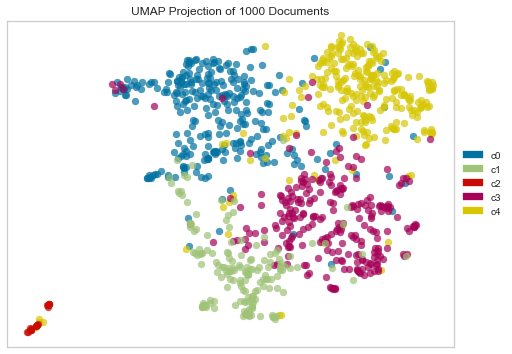

In [16]:
# umap
plot_model(lda_model, plot='umap')

In [17]:
# 可視化可能なプロット全て(選択式)
# 比較検討に便利
evaluate_model(lda_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# モデルの保存/読み込み

In [18]:
# モデル保存
save_model(lda_model, 'LdaNaturalangageProcessingModel')

Model Succesfully Saved


In [19]:
# モデル読み込み
load_lda_model = load_model('LdaNaturalangageProcessingModel')

Model Sucessfully Loaded


In [20]:
# ロードしたモデルでのプロット
plot_model(load_lda_model)

# カスタムストップワードを用いたセットアップ
ドキュメント内で非常に頻度の高い単語を除外するためにカスタムストップワードを指定する。

これらのワードは情報よりもノイズが多くなる。

カスタムストップワードは主観的に選択する必要があり、データセットの理解に基づいている必要がある。。

例：このデータセットでは、顧客ローンのデータセットに取り組んでいるため、「ローン」、「収入」、「ビジネス」、「米ドル」などの単語は情報として不要なことが推測できる

In [21]:
sample_data2 = dataset.sample(1000, random_state=786).reset_index(drop=True)
exp = setup(data=sample_data2, target = 'en', session_id = 123,
            custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                'child', 'school'])

Description,Value
session_id,123
# Documents,1000
Vocab Size,4552
Custom Stopwords,True



# トピックモデルの作成

In [22]:
lda_model2 = create_model('lda')

In [23]:
plot_model(lda_model2, plot='topic_distribution')

キーワードから以下のようなローンであることが推測できる。

　Topic 0：農業ローン

　Topic 1：リテールローン

　Topic 2：国内ローン

　Topic 3：貿易融資(「hair」「wood」「machine」等が含まれていることから推測)

トピックモデリングは反復的な機械学習タスクで、カスタムストップワードの適切なリストを見つけることは繰り返しの検証が必要。

# トピックモデルの評価

In [24]:
# コヒーレンス値を使用した評価
tuned_unsupervised = tune_model(model='lda', multi_core=True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 8 | Coherence: 0.4493


In [25]:
# 分類子を使用した外部評価
# ローンステータス(status)を判断する場合
tuned_classification = tune_model(model='lda', multi_core=True, supervised_target='status')

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 2 | Accuracy : 0.867


In [26]:
print(tuned_classification)

LdaModel(num_terms=4552, num_topics=2, decay=0.5, chunksize=100)


In [27]:
lda_results2 = assign_model(tuned_classification)
lda_results2.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,0.937331,0.062669,Topic 0,0.94
1,Kenya,practitioner run live wife biological adopt cu...,M,1200,partner,Health,0,0.975570,0.024430,Topic 0,0.98
2,Dominican Republic,live boy girl range use clothing support famil...,F,150,partner,Clothing,0,0.142712,0.857288,Topic 1,0.86
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,0.742195,0.257805,Topic 0,0.74
4,Kenya,hotel kaptembwa operating hotel last get good ...,F,300,lender,Food,1,0.890157,0.109843,Topic 0,0.89


# クラス分類によるローンステータス推定

### トピックモデル生成

In [28]:
from pycaret.nlp import *
exp = setup(data=dataset, target = 'en', session_id = 123,
            custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                'child', 'school'])

Description,Value
session_id,123
# Documents,6818
Vocab Size,10768
Custom Stopwords,True


In [29]:
tuned_classification2 = tune_model(model='lda', multi_core=True, supervised_target='status')

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 4 | Accuracy : 0.8583


In [30]:
lda_results2 = assign_model(tuned_classification2)
lda_results2.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Dominican Republic,group look receive small take small already wo...,F,1225,partner,Retail,0,0.004699,0.004588,0.004650,0.986063,Topic 3,0.99
1,Dominican Republic,walk forward group entrepreneur seek second es...,F,1975,lender,Clothing,0,0.054092,0.004094,0.004312,0.937502,Topic 3,0.94
2,Dominican Republic,group hope start group look receive start smal...,F,2175,partner,Clothing,0,0.006874,0.006715,0.006811,0.979600,Topic 3,0.98
3,Dominican Republic,live group look receive first young group want...,F,1425,partner,Clothing,0,0.005094,0.004748,0.004942,0.985217,Topic 3,0.99
4,Dominican Republic,large group hope take second hope use increase...,F,4025,partner,Food,0,0.005586,0.005433,0.005663,0.983318,Topic 3,0.98


### クラス分類モデル生成

In [31]:
# 学習データ/テストデータ分割
train_data = lda_results2.sample(frac=0.90, random_state=42).reset_index(drop=True)
test_data = lda_results2.drop(train_data.index).reset_index(drop=True)

print('データ      ：' + str(dataset.shape) + ' ' + str(dataset.index))
print('学習データ  ：' + str(train_data.shape) + ' ' + str(train_data.index))
print('テストデータ：' + str(test_data.shape) + ' ' + str(test_data.index))

データ      ：(6818, 7) RangeIndex(start=0, stop=6818, step=1)
学習データ  ：(6136, 13) RangeIndex(start=0, stop=6136, step=1)
テストデータ：(682, 13) RangeIndex(start=0, stop=682, step=1)


In [32]:
from pycaret.classification import *
exp = setup(data=train_data, target='status', ignore_features=['en', 'Dominant_Topic', 'Perc_Dominant_Topic'], session_id=42) 
# exp = setup(data=train_data, target='status', ignore_features=['en', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Dominant_Topic', 'Perc_Dominant_Topic'], session_id=42) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(6136, 13)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.911800,0.970600,0.874600,0.943300,0.907600,0.823400
1,Gradient Boosting Classifier,0.910100,0.970300,0.873200,0.941400,0.905900,0.820100
2,CatBoost Classifier,0.908300,0.973300,0.888700,0.923800,0.905700,0.816500
3,Light Gradient Boosting Machine,0.907800,0.972100,0.890100,0.921700,0.905400,0.815500
4,Random Forest Classifier,0.900400,0.956100,0.871800,0.923100,0.896600,0.800600
5,Extra Trees Classifier,0.899900,0.962000,0.881600,0.913900,0.897300,0.799700
6,Ada Boost Classifier,0.885500,0.945100,0.866100,0.899600,0.882300,0.770800
7,Decision Tree Classifier,0.881500,0.881500,0.876000,0.884400,0.880000,0.763000
8,Logistic Regression,0.879900,0.929600,0.843600,0.907800,0.874400,0.759600
9,Ridge Classifier,0.877100,0.000000,0.845000,0.901300,0.872100,0.754000


In [35]:
xgboost_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9070,0.9581,0.8779,0.9303,0.9034,0.8138
1,0.9093,0.9749,0.8732,0.9394,0.9051,0.8185
2,0.9140,0.9680,0.8873,0.9356,0.9108,0.8278
3,0.9070,0.9699,0.8732,0.9347,0.9029,0.8138
4,0.9047,0.9724,0.8638,0.9388,0.8998,0.8091
5,0.8881,0.9595,0.8349,0.9316,0.8806,0.7759
6,0.9184,0.9789,0.8826,0.9495,0.9148,0.8367
7,0.9114,0.9681,0.8732,0.9442,0.9073,0.8227
8,0.9207,0.9703,0.8826,0.9543,0.9171,0.8414
9,0.9371,0.9854,0.8967,0.9745,0.9340,0.8740


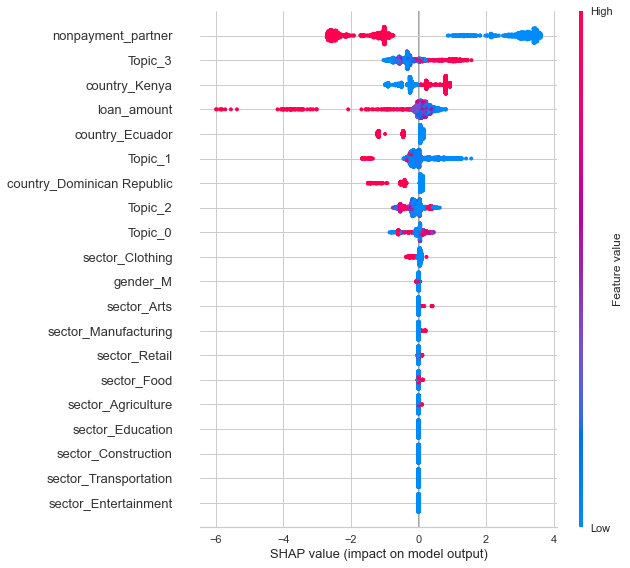

In [36]:
interpret_model(xgboost_model)

In [37]:
predictions = predict_model(xgboost_model, data=test_data)
predictions.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic,Label,Score
0,Kenya,single mother age respectively young son anti ...,F,825,partner,Clothing,1,0.749014,0.003250,0.003426,0.244310,Topic 0,0.75,1,0.6510
1,Kenya,entrepreneur life family member help partnersh...,F,1000,lender,Retail,1,0.508367,0.003504,0.236766,0.251364,Topic 0,0.51,1,0.9910
2,Kenya,single spirit soul like financial challenge ad...,F,1200,lender,Services,1,0.600449,0.003517,0.003670,0.392364,Topic 0,0.60,1,0.9924
3,Kenya,forever educate offer chance start build asset...,F,150,lender,Agriculture,1,0.900849,0.006813,0.007134,0.085204,Topic 0,0.90,1,0.9909
4,Kenya,marry primary self_reliant group member ithiku...,F,600,lender,Agriculture,1,0.968235,0.010646,0.010584,0.010535,Topic 0,0.97,1,0.9867


In [38]:
predictions.to_csv('./predictions.csv')

# 実験全体の保存/読み込み
すべての出力とモデルを含む実験全体を保存可能

In [39]:
# 保存
save_experiment('NaturalLangageProcessingExperiment')

Experiment Succesfully Saved


In [40]:
# 読み込み
experiment = load_experiment('NaturalLangageProcessingExperiment')

,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Compare Models Score Grid
7,Extreme Gradient Boosting
8,Extreme Gradient Boosting Score Grid
